# Lab 7: Dimensionality Reduction

In this assignment, we will learn two unsupervised learning methods: Spectral Clustering and Principal Component Analysis

## Example 1: Spectral Clustering

In this example, we synthesize a toy dataset, which has two clusters. Then, we use K-means, Agglomerative, and Spectral clustering method to partition this dataset, respectively. 

For spectral clustering method, we use two methods to construct the similarity graph. The first one is to use the K-nearest neighbor graph method, where we set $K=1$ in this example. The second method is to use the fully connected graph method, where we use the  Gaussian (aka RBF) kernel method measure the simialrity between two samples. 

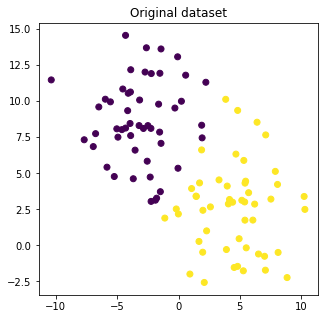

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn import datasets


# generate a toy dataset with two clusters
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3.0, random_state=42)
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')
plt.show()

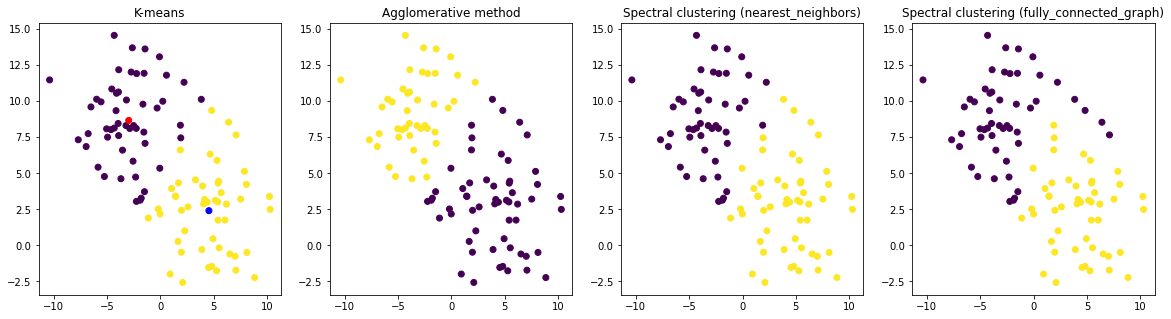

In [2]:
# partition the dataset with K-means
cluster_kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
centroids = cluster_kmeans.cluster_centers_  #get the clustering centroids

# partition the dataset with Agglomerative method
cluster_agg = AgglomerativeClustering(n_clusters=2).fit(X)

# partition the dataset with spectral clustering, here we use the 'nearest_neighbors' method to construct the similarity graph
cluster_sp_nn = SpectralClustering(n_clusters=2, assign_labels="discretize", affinity='nearest_neighbors', random_state=0).fit(X)

# partition the dataset with spectral clustering, here we use the 'fully connected graph' method to construct the similarity graph
cluster_sp_rbf = SpectralClustering(n_clusters=2, assign_labels="discretize", affinity='rbf', random_state=0).fit(X)


plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.scatter(X[:, 0], X[:, 1], c=cluster_kmeans.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c=['r', 'b'])  #visualize the clustering centroids
plt.title('K-means')

plt.subplot(1,4,2)
plt.scatter(X[:, 0], X[:, 1], c=cluster_agg.labels_)
plt.title('Agglomerative method')

plt.subplot(1,4,3)
plt.scatter(X[:, 0], X[:, 1], c=cluster_sp_nn.labels_)
plt.title('Spectral clustering (nearest_neighbors)')

plt.subplot(1,4,4)
plt.scatter(X[:, 0], X[:, 1], c=cluster_sp_rbf.labels_)
plt.title('Spectral clustering (fully_connected_graph)')

plt.show()

Here, we evaluate the performance of these clustering methods with [normalized mutual information (NMI)](https://course.ccs.neu.edu/cs6140sp15/7_locality_cluster/Assignment-6/NMI.pdf)
The larger value indicates the better performance. 

In [3]:
from sklearn.metrics.cluster import normalized_mutual_info_score


nmi_kmeans = normalized_mutual_info_score(cluster_kmeans.labels_, y, average_method='arithmetic')
nmi_agg = normalized_mutual_info_score(cluster_agg.labels_, y, average_method='arithmetic')
nmi_sp_nn = normalized_mutual_info_score(cluster_sp_nn.labels_, y, average_method='arithmetic')
nmi_sp_rbf = normalized_mutual_info_score(cluster_sp_rbf.labels_, y, average_method='arithmetic')


print('The normalized mutual information score of the K-means method is {:.4f}'.format(nmi_kmeans))
print('The normalized mutual information score of the Agglomerative method is {:.4f}'.format(nmi_agg))
print('The normalized mutual information score of the Spectral Clustering (nearest_neighbors) method is {:.4f}'.format(nmi_sp_nn))
print('The normalized mutual information score of the Spectral Clustering (fully_connected_graph) method is {:.4f}'.format(nmi_sp_rbf))

The normalized mutual information score of the K-means method is 0.9291
The normalized mutual information score of the Agglomerative method is 0.6987
The normalized mutual information score of the Spectral Clustering (nearest_neighbors) method is 0.8782
The normalized mutual information score of the Spectral Clustering (fully_connected_graph) method is 0.6350


## Task 1: Spectral clustering for heart disease dataset

In this task, we use the [heart disease](heart.csv) dataset in Lab Assignment 5. 
Each sample has the following feature: 

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect




**The task is to partition all users into two groups with Spectral Clustering method.**

Then, please compare its performance with the performance of K-means and Agglomerative methods that you obtained in Lab Assignment 6.

### 1.1 Preprocess the raw data

* Check whether there are missing values
* Check whether theare are cateogrical features


In [5]:
#When given a dataset, we must first deal with the missing values and any categorical features

#We may not need all these imports, but I am including them just in case:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

df = pd.read_csv("heart.csv")


#First, we will determine whether there are any missing values:
df.isnull().sum()
print("There are no missing values")
#Since the sum of the null values for each feature is zero for every feature, there are no missing values in this dataset
#We do not need to fill in any missing values!


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#Next, we will convert the categorical features to numerical values
#To determine which features are categorical, we will use the following method:
df.info()
print("There are no categorical features")
#From this, we determine that there are no categorical features, which will allow us to partition the dataset with K-means and agglomerative clustering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 1.2 Partition the dataset with Spectral Clustering and compute its NMI
Please use K-nearest neighbor graph method and fully connected graph method to build the similarity graph, respectively. Compare their clustering performance by visualization and computing NMI. 

Our target or 'y' values are: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


C:\Users\aruna\Anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


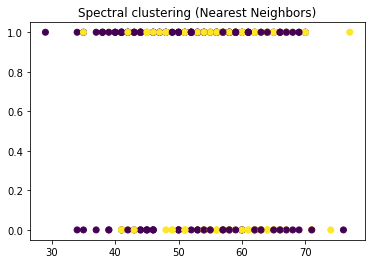

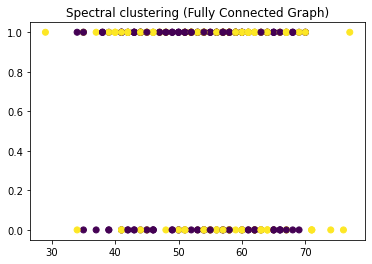

The normalized mutual information score of the Spectral Clustering (Nearest Neighbors) method is 0.0209
The normalized mutual information score of the Spectral Clustering (Fully Connected Graph) method is 0.0007


In [34]:
#This is the import (already imported) to use spectral clustering: from sklearn.cluster import SpectralClustering

#First, I will make a copy of the dataframe to work with:
df_copy = df

#Our X will be all the features except the target column, and the target column will be our y
X = df_copy.drop('target', axis = 1).values
y = df_copy['target'].values
print("Our target or 'y' values are: ")
print(y)

#First, we will partition the dataset with spectral clustering using K-nearest neighbors graph method to construct the similarity graph:
cluster_spec_nn = SpectralClustering(n_clusters=2, assign_labels="discretize", affinity='nearest_neighbors', random_state=0).fit(X)

#Next, we partition the dataset with spectral clustering using the fully connected graph method to construct the similarity graph:
cluster_spec_rbf = SpectralClustering(n_clusters=2, assign_labels="discretize", affinity='rbf', random_state=0).fit(X)

#This is the subplot code for the K-nearest neighbor similarity graph
plt.subplot(1,1,1)
plt.scatter(X[:, 0], X[:, 1], c=cluster_spec_nn.labels_)
plt.title('Spectral clustering (Nearest Neighbors)')
plt.show()

#This is the subplot code for the Fully Connected Graph similarity graph
plt.subplot(1,1,1)
plt.scatter(X[:, 0], X[:, 1], c=cluster_spec_rbf.labels_)
plt.title('Spectral clustering (Fully Connected Graph)')
plt.show()

#Based on these plots, we see that both Spectral clustering similarity graphs do very poor to represent the data. 
#As requested by the TA, the data we are fitting from the heart dataset is everything except the target column, and the y values are from the target column, which only contains values of 0 or 1. 
#Thus, it makes sense that the graph data seems to be split into two sections, either 0 or 1. 
#Unfortunately, neither graph apropiately splits the 0's and 1's, as there some belonging to each color/group in both the 1's and the 0's. 
#Again, this result was expected, as was told to me by the T.A!

#Here, we find the normalized mutual information score (NMI) for both similarity graphs
nmi_spec_nn = normalized_mutual_info_score(cluster_spec_nn.labels_, y, average_method='arithmetic')
nmi_spec_rbf = normalized_mutual_info_score(cluster_spec_rbf.labels_, y, average_method='arithmetic')


print('The normalized mutual information score of the Spectral Clustering (Nearest Neighbors) method is {:.4f}'.format(nmi_spec_nn))
print('The normalized mutual information score of the Spectral Clustering (Fully Connected Graph) method is {:.4f}'.format(nmi_spec_rbf))
#Just as the similarity graphs demonstrate that the clustering methods did not work well on the dataset, the extremely low NMI scores demonstrate that as well. While bad, this result is expected, as stated by the T.A
#In Lab Assignment 6, we saw the NMI Score for the Agglomerative method was 0.0111, which is as poor as the scores seen here, and even worse than the score obtained for Spectral Clustering with Nearest Neighbors. 
#Also in Lab Assignment 6, we saw the NMI Score for the K-Means method was 0.0138, which is again poor, like the scores seen here, and even worse than the score obtained for Spectral Clustering with Nearest Neighbors. 

## Example 2: Principal Component Analysis

In this example, we will show how to use PCA to reduce the dimensionality of the dataset. 

Here, we use the [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). It is a classification dataset. Each sample has 4 features. In this example, we will use PCA to reduce the number of features from 4 to 2, and then visualize this new dataset in 2D space. 

number of original features: 4
number of new features: 2


Text(0.5, 1.0, 'PCA of IRIS dataset')

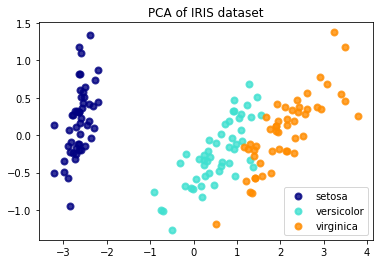

In [31]:
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

# load dataset, which has 3 classes
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

print('number of original features: {}'.format(X.shape[1]))

#centering the data
X -= np.mean(X, axis = 0)  

# pca, reduce the number of features from 4 to 2
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

print('number of new features: {}'.format(X_r.shape[1]))


# visualization
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

In the following, we will apply Kmeans method to this dataset. In particular, we will apply Kmeans to the original data and the dimensionality-reduced data. 

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score


# partition the original dataset with K-means
cluster_original = KMeans(n_clusters=2, random_state=0).fit(X)
centroids = cluster_kmeans.cluster_centers_  #get the clustering centroids

# partition the dimensionality-reduced dataset with K-means
cluster_pca = KMeans(n_clusters=2, random_state=0).fit(X_r)
centroids = cluster_kmeans.cluster_centers_  #get the clustering centroids

#evaluate the clustering performance
nmi_original = normalized_mutual_info_score(cluster_original.labels_, y, average_method='arithmetic')
nmi_pca = normalized_mutual_info_score(cluster_pca.labels_, y, average_method='arithmetic')

print('The normalized mutual information score of the original dataset is {:.4f}'.format(nmi_original))
print('The normalized mutual information score of the dimensionality-reduced dataset is {:.4f}'.format(nmi_pca))


The normalized mutual information score of the original dataset is 0.6565
The normalized mutual information score of the dimensionality-reduced dataset is 0.6565


From the clustering performance, we can see that they have almost the same clustering performance, which means that PCA keeps almost all the information in the original data. 

## Task 2: PCA for  heart disease dataset

In this experiment, we still use the [heart disease](heart.csv) dataset in Lab Assignment 5. 
Each sample has the following feature: 

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

This dataset has a lot of features. In this experiment, we will use PCA method to reduce the dimensionality of the original data, and then we apply the Logistic regression model to the dimensionality-reduced data to do classification. 

### 2.1 Preprocess the raw data

* Check whether there are missing values
* Check whether theare are cateogrical features
* $\color{red}{Centering\ the\ data}$


### 1.2 Partition the dataset with Spectral Clustering and compute its NMI
Please use K-nearest neighbor graph method and fully connected graph method to build the similarity graph, respectively. Compare their clustering performance by visualization and computing NMI. 

In [61]:
#When given a dataset, we must first deal with the missing values and any categorical features

#We may not need all these imports, but I am including them just in case:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

df = pd.read_csv("heart.csv")


#First, we will determine whether there are any missing values:
df.isnull().sum()
print("There are no missing values")
#Since the sum of the null values for each feature is zero for every feature, there are no missing values in this dataset
#We do not need to fill in any missing values!


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [62]:
#Next, we will convert the categorical features to numerical values
#To determine which features are categorical, we will use the following method:
df.info()
print("There are no categorical features")
#From this, we determine that there are no categorical features, which will allow us to partition the dataset with K-means and agglomerative clustering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [63]:
#First, I will make a copy of the dataframe to work with:
df_copy = df

#Our X will be all the features except the target column, and the target column will be our y
X = df_copy.drop('target', axis = 1).values
y = df_copy['target'].values

#I will print the number of original features because we will later be doing dimensionality reduction for visualization using PCA
print('Number of original features: {}'.format(X.shape[1]))
#It makes sense that there are 13 original features because the dataset had 14 features, but the 14th column was the target, which is now our y. Therefore, we should have 13.

#Centering the data
X -= np.mean(X, axis = 0)  

Number of original features: 13


### 2.2 Use PCA to do dimensionality reduction for visualization

* Please reduce the number of features to 2 and visualize this dataset by following the given example.


Number of features after dimensionality reduction: 2


Text(0.5, 1.0, 'PCA of Heart Disease dataset with 2 features')

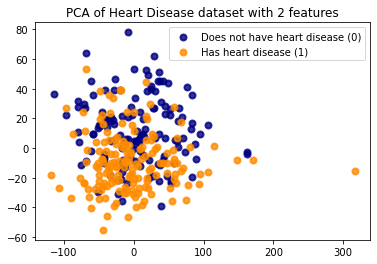

In [64]:
#Following the given example, we will use PCA to reduce the number of features from 13 to 2
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

print('Number of features after dimensionality reduction: {}'.format(X_r.shape[1]))


#Following the given example, this is how we will visualize the dataset
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1], ['Does not have heart disease (0)', 'Has heart disease (1)']):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Heart Disease dataset with 2 features')

### 2.3 Use PCA to do dimensionality reduction and then conduct classification

* Please reduce the number of features to different values (e.g. 2, 5, 10)
* Then, please run logistic regression model with the dimensionality-reduced data.
* Compare the classification performance (e.g. accuracy, F1-score) when using different number of features(e.g. 2, 5, 10). 


In [65]:
#We may not need all these imports, but I am including them just in case
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import random
random.seed(123)

In [66]:
#We currently have a X_r with 2 features, so we will now perform the steps for the logistic regression model. Note: this will occur over multiple cells for organization. 
#Splitting the samples:
target_fea = X_r
target_prediction = y


#Here, we use 14% of samples as the testing set and use the remaining samples to train the logistic regression model.
#Thus, there are 43 of the samples in the testing set and 260 of the samples to train the logistic regression model. This is important for later so that we can evenly split into 10 folds.
X_train_val, X_test, y_train_val, y_test = train_test_split(target_fea, target_prediction, 
                                                            test_size=0.14, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

#Normalizing the features:
normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

print(X_test.shape)
print(X_train_val.shape)

train_val: 260, test: 43
(43, 2)
(260, 2)


In [67]:
#We need to learn the model parameter  𝐰 . 
#However, with different hyperparameters  𝜆 , we can get different model parameter  𝐰 , resulting in different prediction performance. 
#Thus, we will use the 10-fold cross-validation to select the hyperparameter  𝜆 .

#Here we set the folds equal to 10 for 10-fold cross-validation
folds = 10

#We get the number of samples in the training and validation set
num_train_val = X_train_val.shape[0] 

#Now, we shuffle the index of samples in the train_val set
index_of_samples = np.arange(num_train_val) 
shuffle(index_of_samples)

#We split the index of the train_valid set into 10 folds
index_of_folds = index_of_samples.reshape(folds, -1)
print(index_of_folds)

#The hyperparameters chosen are listed below
regularization_coefficient = [10**(-5), 10**(-3), 10**(-2), 10**(-1), 1, 10, 20, 50, 100]

#Variables we create to store the values of the best accuracy and best regression:
best_acc = 0.0
best_reg = 0.0

for reg in regularization_coefficient:
    #10-fold cross-validation
    sum_acc = 0.0
    for fold in range(folds):
        
        index_of_folds_temp = index_of_folds.copy()
        
        #We are getting the index of the validation set and storing it in a variable valid_index
        valid_index = index_of_folds_temp[fold,:].reshape(-1) 
        #We are getting the index of the training set and storing it in a variable train_index
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1)
        
        #Our training set:
        X_train = X_train_val[train_index]
        y_train = y_train_val[train_index]
        
        #Our validation set:
        X_valid = X_train_val[valid_index]
        y_valid = y_train_val[valid_index]
                
        #We write this to build the model with different hyperparameters:
        clf = LogisticRegression(penalty='l2', C=reg, solver='lbfgs')
        
        #Train the model with the training set:
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_valid_pred)
        
        sum_acc += acc
    
    cur_acc = sum_acc / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))
    
    #We now want to store the best hyperparameter:
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_reg = reg
        
print("Best Accuracy: {:.4f} ".format(best_acc))
print("Best Reg: {:}".format(best_reg))

[[ 63 221  54 104 121  98 149 205  31  29 190 243  25 180 142  38 173  94
  148 186 159  24 204  64  75 201]
 [ 12 160 109  61 242 102 129  72 233  56 217  14 219 239   6  57  70 158
   35 216 140 181 106  92 117 112]
 [ 50 127  19 236 153 164 177 105  76 213  28 178 138 200 226  84 119  77
  176 151  83 172 154  16  89  82]
 [ 37 210 197 115 135  66   7 206 256  30 183  47 167 188  91 125 174  20
  249 212 108 257  53  42  71 169]
 [162  60  33 235 157  51  81  88 192 207 161  68 194 225 222  55  10 147
  132 145 184 237  79 254 234 182]
 [191  69 156  65 253  49 166 241   2 220 118 227 113 189  39  45 215 139
   59 126  73  15 128 255 103  58]
 [ 90 195  93 252 150  48   4 251 211  99 116  18 100 141 240 238  43 209
  168 185  21  46 193   8 130  95]
 [107 171 203 124 228 244 199 248 175 232 131 165 101   3 229 144 134 163
  155  52 123 133 245  78 196 250]
 [120  67 122 146 110  74   5 202  32  36 170  23  11 259 114 187  80   1
   17  96 152 224  22 198 111 231]
 [  0  41  62 179 2

In [68]:
#Now that we have the best hyperparameter, we retrain the model:
clf = LogisticRegression(penalty='l2', C=best_reg, solver='lbfgs')
clf.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf.predict(X_test)


acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

#Visualizing the elements of the learned model parameter vector w with a bar plot:
print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

print("Our learned model parameter vector 'w': ", abs(clf.coef_[0]))

accuracy: 0.767, recall: 1.000, precision: 0.677, f1: 0.808,
Our learned model parameter vector 'w':  [0.15225548 0.75717594]


Number of features after dimensionality reduction: 5


Text(0.5, 1.0, 'PCA of Heart Disease dataset with 5 features')

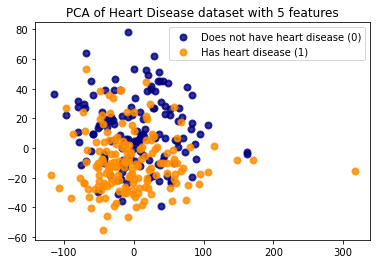

In [51]:
#We have reduced the number of features to 2 above, so we will now reduce the number of features to 5:
pca = PCA(n_components=5)
X_r = pca.fit(X).transform(X)

print('Number of features after dimensionality reduction: {}'.format(X_r.shape[1]))


#Following the given example, this is how we will visualize the dataset
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1], ['Does not have heart disease (0)', 'Has heart disease (1)']):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Heart Disease dataset with 5 features')

In [57]:
#Splitting the samples:
target_fea = X_r
target_prediction = y


#Here, we use 14% of samples as the testing set and use the remaining samples to train the logistic regression model.
#Thus, there are 43 of the samples in the testing set and 260 of the samples to train the logistic regression model. This is important for later so that we can evenly split into 10 folds.
X_train_val, X_test, y_train_val, y_test = train_test_split(target_fea, target_prediction, 
                                                            test_size=0.14, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

#Normalizing the features:
normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

print(X_test.shape)
print(X_train_val.shape)

train_val: 260, test: 43
(43, 5)
(260, 5)


In [58]:
#We need to learn the model parameter  𝐰 . 
#However, with different hyperparameters  𝜆 , we can get different model parameter  𝐰 , resulting in different prediction performance. 
#Thus, we will use the 10-fold cross-validation to select the hyperparameter  𝜆 .

#Here we set the folds equal to 10 for 10-fold cross-validation
folds = 10

#We get the number of samples in the training and validation set
num_train_val = X_train_val.shape[0] 

#Now, we shuffle the index of samples in the train_val set
index_of_samples = np.arange(num_train_val) 
shuffle(index_of_samples)

#We split the index of the train_valid set into 10 folds
index_of_folds = index_of_samples.reshape(folds, -1)
print(index_of_folds)

#The hyperparameters chosen are listed below
regularization_coefficient = [10**(-5), 10**(-3), 10**(-2), 10**(-1), 1, 10, 20, 50, 100]

#Variables we create to store the values of the best accuracy and best regression:
best_acc = 0.0
best_reg = 0.0

for reg in regularization_coefficient:
    #10-fold cross-validation
    sum_acc = 0.0
    for fold in range(folds):
        
        index_of_folds_temp = index_of_folds.copy()
        
        #We are getting the index of the validation set and storing it in a variable valid_index
        valid_index = index_of_folds_temp[fold,:].reshape(-1) 
        #We are getting the index of the training set and storing it in a variable train_index
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1)
        
        #Our training set:
        X_train = X_train_val[train_index]
        y_train = y_train_val[train_index]
        
        #Our validation set:
        X_valid = X_train_val[valid_index]
        y_valid = y_train_val[valid_index]
                
        #We write this to build the model with different hyperparameters:
        clf = LogisticRegression(penalty='l2', C=reg, solver='lbfgs')
        
        #Train the model with the training set:
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_valid_pred)
        
        sum_acc += acc
    
    cur_acc = sum_acc / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))
    
    #We now want to store the best hyperparameter:
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_reg = reg
        
print("Best Accuracy: {:.4f} ".format(best_acc))
print("Best Reg: {:}".format(best_reg))


[[ 63 221  54 104 121  98 149 205  31  29 190 243  25 180 142  38 173  94
  148 186 159  24 204  64  75 201]
 [ 12 160 109  61 242 102 129  72 233  56 217  14 219 239   6  57  70 158
   35 216 140 181 106  92 117 112]
 [ 50 127  19 236 153 164 177 105  76 213  28 178 138 200 226  84 119  77
  176 151  83 172 154  16  89  82]
 [ 37 210 197 115 135  66   7 206 256  30 183  47 167 188  91 125 174  20
  249 212 108 257  53  42  71 169]
 [162  60  33 235 157  51  81  88 192 207 161  68 194 225 222  55  10 147
  132 145 184 237  79 254 234 182]
 [191  69 156  65 253  49 166 241   2 220 118 227 113 189  39  45 215 139
   59 126  73  15 128 255 103  58]
 [ 90 195  93 252 150  48   4 251 211  99 116  18 100 141 240 238  43 209
  168 185  21  46 193   8 130  95]
 [107 171 203 124 228 244 199 248 175 232 131 165 101   3 229 144 134 163
  155  52 123 133 245  78 196 250]
 [120  67 122 146 110  74   5 202  32  36 170  23  11 259 114 187  80   1
   17  96 152 224  22 198 111 231]
 [  0  41  62 179 2

In [59]:
#Now that we have the best hyperparameter, we retrain the model:
clf = LogisticRegression(penalty='l2', C=best_reg, solver='lbfgs')
clf.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf.predict(X_test)


acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

#Visualizing the elements of the learned model parameter vector w with a bar plot:
print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

print("Our learned model parameter vector 'w': ", abs(clf.coef_[0]))

accuracy: 0.860, recall: 0.905, precision: 0.826, f1: 0.864,
Our learned model parameter vector 'w':  [0.18159379 0.85943699 0.18298669 0.00855675 1.08113256]


Number of features after dimensionality reduction: 10


Text(0.5, 1.0, 'PCA of Heart Disease dataset with 10 features')

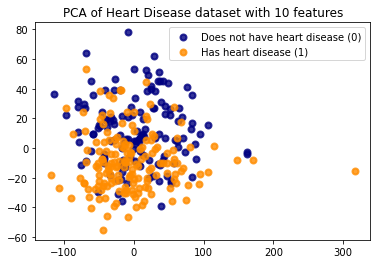

In [70]:
#We have reduced the number of features to 2 and 5 above, so we will now reduce the number of features to 10:
pca = PCA(n_components=10)
X_r = pca.fit(X).transform(X)

print('Number of features after dimensionality reduction: {}'.format(X_r.shape[1]))


#Following the given example, this is how we will visualize the dataset
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1], ['Does not have heart disease (0)', 'Has heart disease (1)']):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Heart Disease dataset with 10 features')

In [71]:
#Splitting the samples:
target_fea = X_r
target_prediction = y


#Here, we use 14% of samples as the testing set and use the remaining samples to train the logistic regression model.
#Thus, there are 43 of the samples in the testing set and 260 of the samples to train the logistic regression model. This is important for later so that we can evenly split into 10 folds.
X_train_val, X_test, y_train_val, y_test = train_test_split(target_fea, target_prediction, 
                                                            test_size=0.14, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

#Normalizing the features:
normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

print(X_test.shape)
print(X_train_val.shape)

train_val: 260, test: 43
(43, 10)
(260, 10)


In [72]:
#We need to learn the model parameter  𝐰 . 
#However, with different hyperparameters  𝜆 , we can get different model parameter  𝐰 , resulting in different prediction performance. 
#Thus, we will use the 10-fold cross-validation to select the hyperparameter  𝜆 .

#Here we set the folds equal to 10 for 10-fold cross-validation
folds = 10

#We get the number of samples in the training and validation set
num_train_val = X_train_val.shape[0] 

#Now, we shuffle the index of samples in the train_val set
index_of_samples = np.arange(num_train_val) 
shuffle(index_of_samples)

#We split the index of the train_valid set into 10 folds
index_of_folds = index_of_samples.reshape(folds, -1)
print(index_of_folds)

#The hyperparameters chosen are listed below
regularization_coefficient = [10**(-5), 10**(-3), 10**(-2), 10**(-1), 1, 10, 20, 50, 100]

#Variables we create to store the values of the best accuracy and best regression:
best_acc = 0.0
best_reg = 0.0

for reg in regularization_coefficient:
    #10-fold cross-validation
    sum_acc = 0.0
    for fold in range(folds):
        
        index_of_folds_temp = index_of_folds.copy()
        
        #We are getting the index of the validation set and storing it in a variable valid_index
        valid_index = index_of_folds_temp[fold,:].reshape(-1) 
        #We are getting the index of the training set and storing it in a variable train_index
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1)
        
        #Our training set:
        X_train = X_train_val[train_index]
        y_train = y_train_val[train_index]
        
        #Our validation set:
        X_valid = X_train_val[valid_index]
        y_valid = y_train_val[valid_index]
                
        #We write this to build the model with different hyperparameters:
        clf = LogisticRegression(penalty='l2', C=reg, solver='lbfgs')
        
        #Train the model with the training set:
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_valid_pred)
        
        sum_acc += acc
    
    cur_acc = sum_acc / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))
    
    #We now want to store the best hyperparameter:
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_reg = reg
        
print("Best Accuracy: {:.4f} ".format(best_acc))
print("Best Reg: {:}".format(best_reg))


[[104  47  40 125  90 211 132 133 142  20 244  89 250 226 196 190   0 134
  234 152 185 188  60 123 100  34]
 [ 54  74 189  21 167  32  48  85 246 124 131 164 213 168 184 227  39  61
   22  29 233 181   6 113 121 160]
 [115  18   2 243 232 235  93 223 175 247  25  79 110  53  28  59 251 258
  198  65  95  84 253 141  38  23]
 [ 37 111 236 172 183 177  41 254 186 252 139  51   9  26 173   4  30 195
  237 208 182  19  45 225 105 161]
 [200 230 130   7 201 179 101 102  52 166  81 157  66  24 103  35  71  69
   78 159 199 135 205 145  57 194]
 [163  77 224 137 187 140  50  42 170 151  11 108 231 217  43  72 255  16
   58  98 249   3 148  73 158 129]
 [118   8 259  56 209 191  36 138 120  10 136 122  33 127 169 109   5 238
  222  12  86  70 147 204 116 241]
 [ 63  88 193 144 112  68 228 165  62  83 180 146 119  27  76  99 150 240
  221  14  82 154 218 214 242  75]
 [ 17  94 216 143  44 212  67 128  96 106 215  15 206  97  46 210  49 192
  207 245 256 197  55  91  80 107]
 [219 171 239 117 2

In [73]:
#Now that we have the best hyperparameter, we retrain the model:
clf = LogisticRegression(penalty='l2', C=best_reg, solver='lbfgs')
clf.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf.predict(X_test)


acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

#Visualizing the elements of the learned model parameter vector w with a bar plot:
print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

print("Our learned model parameter vector 'w': ", abs(clf.coef_[0]))

accuracy: 0.860, recall: 0.857, precision: 0.857, f1: 0.857,
Our learned model parameter vector 'w':  [0.20433019 0.90203167 0.18186557 0.02939836 1.1182301  0.50697698
 0.05622137 0.37361261 0.18075266 0.03523287]


In [74]:
#While already completed in lab assignment 5, we will reshow the scores and learned model parameter vector 'w' with the original dataset of 13 features
#Splitting the samples:
target_fea = df.drop('target', axis=1).values
target_prediction = df['target'].values


#Here, we use 14% of samples as the testing set and use the remaining samples to train the logistic regression model.
#Thus, there are 43 of the samples in the testing set and 260 of the samples to train the logistic regression model. This is important for later so that we can evenly split into 10 folds.
X_train_val, X_test, y_train_val, y_test = train_test_split(target_fea, target_prediction, 
                                                            test_size=0.14, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

#Normalizing the features:
normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

print(X_test.shape)
print(X_train_val.shape)

train_val: 260, test: 43
(43, 13)
(260, 13)


In [75]:
#We need to learn the model parameter  𝐰 . 
#However, with different hyperparameters  𝜆 , we can get different model parameter  𝐰 , resulting in different prediction performance. 
#Thus, we will use the 10-fold cross-validation to select the hyperparameter  𝜆 .

#Here we set the folds equal to 10 for 10-fold cross-validation
folds = 10

#We get the number of samples in the training and validation set
num_train_val = X_train_val.shape[0] 

#Now, we shuffle the index of samples in the train_val set
index_of_samples = np.arange(num_train_val) 
shuffle(index_of_samples)

#We split the index of the train_valid set into 10 folds
index_of_folds = index_of_samples.reshape(folds, -1)
print(index_of_folds)

#As suggested above, the hyperparameters chosen are listed below
regularization_coefficient = [10**(-5), 10**(-3), 10**(-2), 10**(-1), 1, 10, 20, 50, 100]

#Variables we create to store the values of the best accuracy and best regression:
best_acc = 0.0
best_reg = 0.0

for reg in regularization_coefficient:
    #10-fold cross-validation
    sum_acc = 0.0
    for fold in range(folds):
        
        index_of_folds_temp = index_of_folds.copy()
        
        #We are getting the index of the validation set and storing it in a variable valid_index
        valid_index = index_of_folds_temp[fold,:].reshape(-1) 
        #We are getting the index of the training set and storing it in a variable train_index
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1)
        
        #Our training set:
        X_train = X_train_val[train_index]
        y_train = y_train_val[train_index]
        
        #Our validation set:
        X_valid = X_train_val[valid_index]
        y_valid = y_train_val[valid_index]
                
        #We write this to build the model with different hyperparameters:
        clf = LogisticRegression(penalty='l2', C=reg, solver='lbfgs')
        
        #Train the model with the training set:
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_valid_pred)
        
        sum_acc += acc
    
    cur_acc = sum_acc / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))
    
    #We now want to store the best hyperparameter:
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_reg = reg
        
print("Best Accuracy: {:.4f} ".format(best_acc))
print("Best Reg: {:}".format(best_reg))


[[231  48 117 178 225 237 148 151  44 144 229 100 206 108  17  35 203 219
   40 134  51 190 157 146  38 198]
 [161  62  29 259  42  59  11 210  85 242 111  95 168 145   9 256  98 131
  143  56  79 147  71  13   4 233]
 [177  90 135  55 174 120  82 191  12 245  37  57 241 194 195 192  19 189
  215   5 222  27  54 128 239 185]
 [150 257  43  70  76 138  97  24 182 119  81 212 158 101 180 170 227   3
  217  39 121  21 126 155 255 238]
 [253 179 116 127 103 122 137 183  53 193 125 224 115 124 130  86  45 114
  188 118 104 159 246 133 153 223]
 [228   1 220 251  78 221  84 169 181  30 132 163  23 105  64 204 149  65
  226  92 197  31  69 186 230  34]
 [ 25 187  93 175 166 205   7  66   6  99  41 211 141 167  72 123 109 252
  247  49  18 173 162 232  50 136]
 [152  26 113 234 156  47 184  96  20  75 165 213 129 199 216 176  80  89
  235 214   8 106  33 160 249  94]
 [218 107  67 139 164 196 154 243   0 202 142  32 250  73  63  28  16 140
   14  15 208 258 201  88 102 240]
 [ 83  74   2 172  

In [76]:
#Now that we have the best hyperparameter, we retrain the model:
clf = LogisticRegression(penalty='l2', C=best_reg, solver='lbfgs')
clf.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf.predict(X_test)


acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

#Visualizing the elements of the learned model parameter vector w with a bar plot:
print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

print("Our learned model parameter vector 'w': ", abs(clf.coef_[0]))

#It should be noted that, although we took the absolute value of the coefficients, a positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. 
#A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

accuracy: 0.791, recall: 0.905, precision: 0.731, f1: 0.809,
Our learned model parameter vector 'w':  [0.07260054 0.20696578 0.25200775 0.07372149 0.0360397  0.02899053
 0.03336877 0.17880825 0.21720207 0.20099102 0.13853072 0.26740514
 0.1796196 ]


In [77]:
#Comparing the classification performance (e.g. accuracy, F1-score) when using different number of features(2, 5, 10, 13):
print("Scores for 2 features: accuracy: 0.767, recall: 1.000, precision: 0.677, f1: 0.808, and our learned model parameter vector 'w' is [0.15225548 0.75717594]")
print("Scores for 5 features: accuracy: 0.860, recall: 0.905, precision: 0.826, f1: 0.864, and our learned model parameter vector 'w' is [0.18159379 0.85943699 0.18298669 0.00855675 1.08113256]")
print("Scores for 10 features: accuracy: 0.860, recall: 0.857, precision: 0.857, f1: 0.857, and our learned model parameter vector 'w' is [0.20433019 0.90203167 0.18186557 0.02939836 1.1182301 0.50697698 0.05622137 0.37361261 0.18075266 0.03523287]")
print("Scores for 13/all features: accuracy: 0.791, recall: 0.905, precision: 0.731, f1: 0.809, and our learned model parameter vector 'w' is [0.07260054 0.20696578 0.25200775 0.07372149 0.0360397 0.02899053 0.03336877 0.17880825 0.21720207 0.20099102 0.13853072 0.26740514 0.1796196]")

#Based on these scores, we see the accuracy is highest with 5 or 10 features, the recall is highest with 2 features, the precision is highest with 10 features, and the f1 score is highest with 5 features.
#Furthermore, we see the accuracy is lowest with 2 features, the recall is lowest with 10 features, the precision is lowest with 2 features, and the f1 score is lowest with 2 features.
#Overall, we can then see as the number of features increases, the scores increase.
#Also, as the number of features increase, the size of the learned model parameter vector 'w' obviously increases correspondingly.

Scores for 2 features: accuracy: 0.767, recall: 1.000, precision: 0.677, f1: 0.808, and our learned model parameter vector 'w' is [0.15225548 0.75717594]
Scores for 5 features: accuracy: 0.860, recall: 0.905, precision: 0.826, f1: 0.864, and our learned model parameter vector 'w' is [0.18159379 0.85943699 0.18298669 0.00855675 1.08113256]
Scores for 10 features: accuracy: 0.860, recall: 0.857, precision: 0.857, f1: 0.857, and our learned model parameter vector 'w' is [0.20433019 0.90203167 0.18186557 0.02939836 1.1182301 0.50697698 0.05622137 0.37361261 0.18075266 0.03523287]
Scores for 13/all features: accuracy: 0.791, recall: 0.905, precision: 0.731, f1: 0.809, and our learned model parameter vector 'w' is [0.07260054 0.20696578 0.25200775 0.07372149 0.0360397 0.02899053 0.03336877 0.17880825 0.21720207 0.20099102 0.13853072 0.26740514 0.1796196]
